# Ensemble learning

In [ ]:
#from sklearn import model_selection 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
import pandas as pd
from sklearn import datasets

In [ ]:
# load the data 
digits = datasets.load_digits()
X = digits.data
Y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, Y,\
    test_size=0.2, random_state=22)

seed = 1710925

# initialize the base classifier 
base_cls = DecisionTreeClassifier(max_depth=3) 
  
# no. of base classifier 
num_trees = 500

# bagging classifier
# More parameters are available. See documentation:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
model = BaggingClassifier(base_estimator = base_cls, 
                          n_estimators = num_trees, 
                          random_state = seed)

In [ ]:
model.fit(X_train, y_train)
accuracy = sum(model.predict(X_test) == y_test)/len(y_test)
print('Test Accuracy:', accuracy)

Test Accuracy: 0.7138888888888889


# Grid search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()
#clf = DecisionTreeClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9],
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(clf, parameters,
                        scoring=acc_scorer,
                        return_train_score=True)
grid_obj = grid_obj.fit(X_train, y_train)

In [ ]:
print(grid_obj.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 9}


### Best test score across all models

In [ ]:
# Parameters and evaluation of each model
scores = pd.DataFrame(grid_obj.cv_results_)
#scores[['params', 'mean_test_score', 'std_test_score', 'mean_train_score']]
max(scores['mean_test_score'])

0.8225561362756484

### Train again using best parametrs

In [ ]:
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))

0.8194444444444444


# Voting
## Hard voting

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, Y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y,\
    test_size=0.2, random_state=934)

log_clf = LogisticRegression(max_iter=10000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
	estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc',svm_clf)],
	voting = 'hard')
voting_clf = voting_clf.fit(X_train, y_train)

In [ ]:
print(accuracy_score(y_test, voting_clf.predict(X_test)))

0.9298245614035088


## Soft Voting

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, Y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y,\
    test_size=0.2, random_state=934)

log_clf = LogisticRegression(max_iter=10000)
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
	estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc',svm_clf)],
    ################
	voting = 'soft',
    weights=(2,6,5))
    ################
voting_clf.fit(X_train, y_train)
print(accuracy_score(y_test, voting_clf.predict(X_test)))

0.9385964912280702


# Bagging
### Only instances are sampled

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=50, # number of base estimators
    max_samples=1.0, # number of samples to draw from X
    bootstrap=True, # Draw with replacement
    n_jobs=-1, # number of jobs to run in parallel
    random_state=934)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9122807017543859


# Random Patches
## Sample both the training instances as well as features

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=50, # number of base estimators
    #max_samples=1.0, # number of samples to draw from X
    bootstrap=False, # Draw with replacement
    n_jobs=-1, # number of jobs to run in parallel
    random_state=22,
    bootstrap_features = True, # 
    max_samples = 0.6)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9122807017543859


# Random Subspaces
## keeps all the instances but samples features.

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=50, # number of base estimators
    #max_samples=1.0, # number of samples to draw from X
    bootstrap=True, # Draw with replacement
    n_jobs=-1, # number of jobs to run in parallel
    random_state=22,
    bootstrap_features = True, # 
    max_samples = 0.6,
    max_features = 0.6)
#max_samples less than 1.0 or discarded
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9122807017543859


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=5000, 
                                 criterion='gini',
                                 max_depth=None,
                                 max_leaf_nodes=16,
                                 n_jobs=-1, # Parallel cores
                                 random_state=934,
                                 bootstrap = True,
                                 max_samples=1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.26666666666666666


# Adaboost

In [ ]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Split dataset into training set and test set
# 80% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

![title](https://d31ezp3r8jwmks.cloudfront.net/variants/6bTVLAHna7XM5NkrEHeYXuKT/d2e337a4f6900f8d0798c596eb0607a8e0c2fbddb6a7ab7afcd60009c119d4c7)

In [ ]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         base_estimator=DecisionTreeClassifier(max_depth=1))
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


# Stacking

In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('svr', SVR(C=1, gamma=1e-6))]

In [ ]:
# Stacking model
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor(random_state=934))

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=934)
# Fit models
reg = reg.fit(X_train, y_train)

In [ ]:
# Test stacking model
y_pred = reg.predict(X_test)
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: 0.84


Text(0, 0.5, 'Predicted')

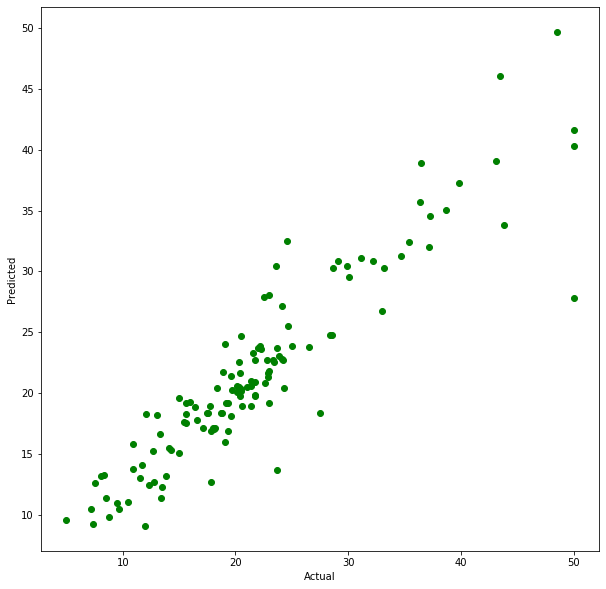

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10), facecolor='w')
plt.scatter(y_test, y_pred, c="g")
plt.xlabel("Actual")
plt.ylabel("Predicted")